# HPRA paper tests
Trying out SimpleHypergraphs.jl etc for HPRA paper


In [1]:
using DrWatson
@quickactivate "graphs"

In [2]:
includet(srcdir("HPRA.jl"))

In [3]:
# examples of  HyperEdge
s2 = HyperEdge()
@show s2, typeof(s2)
@show s2.e_id
s2.e_id =-3
s = HyperEdge(12, Dict([("A", 1.), ("B", 2.)]))
@show s, typeof(s)
# s3 = HyperEdge(12, Dict([("A", 1.), ("B", 2.)]))

s3 = HyperEdge(12, Dict([(1, 1.0), (2, 2.0)]))

(s2, typeof(s2)) = (HyperEdge{Int64}(0, Dict{Int64, Float64}()), HyperEdge{Int64})
s2.e_id = 0
(s, typeof(s)) = (HyperEdge{String}(12, Dict("B" => 2.0, "A" => 1.0)), HyperEdge{String})


HyperEdge{Int64}(12, Dict(2 => 2.0, 1 => 1.0))

In [4]:
h1 = HyperEdge{Int64}(6, Dict(2 => 1.0, 1 => 1.0))
h2 = HyperEdge{Int64}(6, Dict(4 => 1.0, 2 => 1.0, 1 => 1.0))
h3 = HyperEdge{Int64}(6, Dict(2 => 1.0, 1 => 1.0))
h4 = HyperEdge(6, Dict(1 => 1.0, 2 => 1.0))


@show h1 == h4, isequal(h1, h4), h1 == h2
@show h1 != h4, h1 != h2

# kind of set of Hyperedges can be defined w/ hg_in_cont -- cant find how to convince Set{HyperEdge} to act like a set
cont = [h1]
for h in [h2, h3, h4]
    cont = h_edge_in_cont(cont, h)
end
cont

(h1 == h4, isequal(h1, h4), h1 == h2) = (true, true, false)
(h1 != h4, h1 != h2) = (false, true)


2-element Vector{HyperEdge{Int64}}:
 HyperEdge{Int64}(6, Dict(2 => 1.0, 1 => 1.0))
 HyperEdge{Int64}(6, Dict(4 => 1.0, 2 => 1.0, 1 => 1.0))

In [5]:
# Sets dont act correctly, eben though isequal is defined 
ss= Set{HyperEdge}([h1,h2,h3,h4])

@assert HyperEdge(6, Dict(4 => 1.0, 2 => 1.0, 1 => 1.0)) == HyperEdge{Int64}(6, Dict(4 => 1.0, 2 => 1.0, 1 => 1.0))
push!(ss, HyperEdge(6, Dict(4 => 1.0, 2 => 1.0, 1 => 1.0)))

Set{HyperEdge} with 5 elements:
  HyperEdge{Int64}(6, Dict(2 => 1.0, 1 => 1.0))
  HyperEdge{Int64}(6, Dict(4 => 1.0, 2 => 1.0, 1 => 1.0))
  HyperEdge{Int64}(6, Dict(4 => 1.0, 2 => 1.0, 1 => 1.0))
  HyperEdge{Int64}(6, Dict(2 => 1.0, 1 => 1.0))
  HyperEdge{Int64}(6, Dict(2 => 1.0, 1 => 1.0))


The following is implemented in `HPRA.lj` (see next cell):

With $V$ the set of n nodes (or vertices) and $E$ the set of m hyperedges,
the Degree of node v is defined as $$hyper\_degree(v) = \sum_{e ∈E,\;v ∈e} w(e)$$

$Neighbors (v)$ is a set containing the one-hop neighbors of node
$v$ (nodes of hyperedges, $v$ is part of).




Resource Allocation  
$$RA(x, y) = \sum_{z\; ∈ \;[ \;N (x )\;∩ \; N (y)\;]} \frac{1}{d(z)}
$$

HRA Direct
$$ HRA_{direct} (x, y) = \sum_{e \; s.t. \; x,y \;∈\;e} \frac{1}{ δ(e) - 1} $$

$$HRA_{indirect} (x, y) = \sum_{z \; ∈\; [N (x) \;∩\; N(y)]} 
 HRA_{direct} (x,z) × \frac{1}{d(z)}  × HRA_{direct} (z, y) $$
$$ NHAS (x,e) = \frac{1}{|e|} \sum_{y \;\in \; e} HRA(x, y) $$


Average $F_1$ Score  is the average of the
F1-score of the best matching missing hyperedge to
each predicted hyperedge and the F1-score of the best-matching predicted hyperedge to each missing hyperedge:

$$ \^{F}_1 = \frac{1}{2}\bigl( \quad \frac{1}{|E^M|} \sum_{e_i ∈ E^M}  F_1(e_i , ê_{g(i)} )+

\frac{1}{|E^P|} \sum_{e_i ∈ E^P}  F_1(e_{g^{\prime}(i)}, ê_i  ) \quad \bigr)$$ 

where $g$ and $g^′$ are defined as follows: 

$g(i) = argmax_j (F_1(e_i , ê_j ))$ 

$g^′(i) = argmax_j (F_1(e_j , ê_i ))$

In [6]:

scenes = Dict([(0, ["FN", "TH"]),
    (1, ["TH", "JV"]),
    (2, ["BM", "FN", "JA"]),
    (3, ["JV", "JU", "CH", "BM"]),
    (4, ["JU", "CH", "BR", "CN", "CC", "JV", "BM"]),
    (5, ["TH", "GP"]),
    (6, ["GP", "MP"]),
    (7, ["MA", "GP"])]) |> sort

tor = Set()
for (i, k) in scenes
    #@show i,k
    for kk in k
        push!(tor, kk)
    end
end
ttor = Dict()
for (i, val) in enumerate(tor)
    ttor[val] = i
end


sscenes = Dict()
for (i, val) in scenes

    v = []
    for k in val
        @show i,val, k, string(ttor[k])
        push!(v, [k])
    end
    sscenes[i] = v
end

# for i in sscenes
#      print(i, sscenes[i])
# end    
ttor

(i, val, k, string(ttor[k])) = (0, ["FN", "TH"], "FN", "1")
(i, val, k, string(ttor[k])) = (0, ["FN", "TH"], "TH", "9")
(i, val, k, string(ttor[k])) = (1, ["TH", "JV"], "TH", "9")
(i, val, k, string(ttor[k])) = (1, ["TH", "JV"], "JV", "12")
(i, val, k, string(ttor[k])) = (2, ["BM", "FN", "JA"], "BM", "8")
(i, val, k, string(ttor[k])) = (2, ["BM", "FN", "JA"], "FN", "1")
(i, val, k, string(ttor[k])) = (2, ["BM", "FN", "JA"], "JA", "2")
(i, val, k, string(ttor[k])) = (3, ["JV", "JU", "CH", "BM"], "JV", "12")
(i, val, k, string(ttor[k])) = (3, ["JV", "JU", "CH", "BM"], "JU", "10")
(i, val, k, string(ttor[k])) = (3, ["JV", "JU", "CH", "BM"], "CH", "4")
(i, val, k, string(ttor[k])) = (3, ["JV", "JU", "CH", "BM"], "BM", "8")
(i, val, k, string(ttor[k])) = (4, ["JU", "CH", "BR", "CN", "CC", "JV", "BM"], "JU", "10")
(i, val, k, string(ttor[k])) = (4, ["JU", "CH", "BR", "CN", "CC", "JV", "BM"], "CH", "4")
(i, val, k, string(ttor[k])) = (4, ["JU", "CH", "BR", "CN", "CC", "JV", "BM"], "BR", "3")


Dict{Any, Any} with 13 entries:
  "FN" => 1
  "JA" => 2
  "BR" => 3
  "CH" => 4
  "CC" => 5
  "CN" => 6
  "MP" => 7
  "BM" => 8
  "TH" => 9
  "JU" => 10
  "GP" => 11
  "JV" => 12
  "MA" => 13

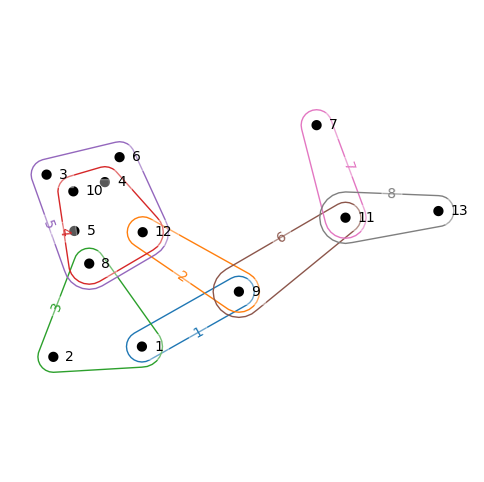

In [7]:
# n of vertices 
n_vert = 13; #length(ttor)
# n of hyperegdes
n_edges = 8 #length(scenes)

h = Hypergraph{Float64}(n_vert, n_edges);
for (i,ki) in scenes
    #println("$i => $ki")
    for k in ki
        h[ttor[k],i+1] = 1
        #@show k,ttor(k], i+1
    end
end
draw(h, HyperNetX; width=6, height=6) #, no_border=true)

1 => [1, 2, 3]
2 => [1, 4, 5]
3 => [1, 5, 6, 7, 8]


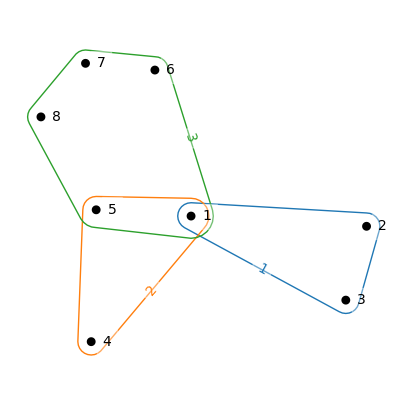

In [8]:
toy = Dict([ (1 , [1,2,3]),
(2 , [1,4,5]),
(3 , [1,5,6,7,8]) ]) |> sort

htoy = Hypergraph{Float64}(8, 3);

for (i,ki) in toy
    println("$i => $ki")
    for k in ki
        htoy[k,i] = 1
        #@show k rott[k] i+1
    end
end
draw(htoy, HyperNetX; width=5, height=5, no_border=true)

In [9]:
a = HRA_indirect(h, 6, 5)
b = HRA_direct(h, 6, 5)
#intersect(a,b)
a,b

(0.07407407407407407, 0.16666666666666666)

In [10]:
NHAS(h,11,7)


0.5

In [11]:
# test HRA direct as per fig 1 of HPRA paper
for nod in sort(h_nodes(htoy))
      hrad =  HRA_direct(htoy,1,nod)
      hrain = HRA_indirect(htoy,1,nod)
      hra   = HRA(htoy,1,nod)
    
    println("$(nod) -> hra(1,$(nod)) = $(hrad) + $(hrain) = $(hra)")
end

1 -> hra(1,1) = nothing + nothing = nothing
2 -> hra(1,2) = 0.5 + 0.25 = 0.75
3 -> hra(1,3) = 0.5 + 0.25 = 0.75
4 -> hra(1,4) = 0.5 + 0.1875 = 0.6875
5 -> hra(1,5) = 0.75 + 0.4375 = 1.1875
6 -> hra(1,6) = 0.25 + 0.21875 = 0.46875
7 -> hra(1,7) = 0.25 + 0.21875 = 0.46875
8 -> hra(1,8) = 0.25 + 0.21875 = 0.46875


In [12]:
weighted_h = deepcopy(h)

13×8 Hypergraph{Float64, Nothing, Nothing, Dict{Int64, Float64}}:
 1.0        nothing  1.0        nothing  …   nothing   nothing   nothing
  nothing   nothing  1.0        nothing      nothing   nothing   nothing
  nothing   nothing   nothing   nothing      nothing   nothing   nothing
  nothing   nothing   nothing  1.0           nothing   nothing   nothing
  nothing   nothing   nothing   nothing      nothing   nothing   nothing
  nothing   nothing   nothing   nothing  …   nothing   nothing   nothing
  nothing   nothing   nothing   nothing      nothing  1.0        nothing
  nothing   nothing  1.0       1.0           nothing   nothing   nothing
 1.0       1.0        nothing   nothing     1.0        nothing   nothing
  nothing   nothing   nothing  1.0           nothing   nothing   nothing
  nothing   nothing   nothing   nothing  …  1.0       1.0       1.0
  nothing  1.0        nothing  1.0           nothing   nothing   nothing
  nothing   nothing   nothing   nothing      nothing   nothing 

Now we add the connection weights

In [13]:
weighted_h[1:3,1] .= 1
weighted_h[3,4] = 2
weighted_h[2,3] = 3
weighted_h[4,3:4] .= 4
weighted_h[5,4] = 5
weighted_h[4:5,2] .= 6
weighted_h[7,5] = 1
weighted_h[6,5] = 1
weighted_h[7,1] = 10
weighted_h

13×8 Hypergraph{Float64, Nothing, Nothing, Dict{Int64, Float64}}:
  1.0        nothing  1.0        nothing  …   nothing   nothing   nothing
  1.0        nothing  3.0        nothing      nothing   nothing   nothing
  1.0        nothing   nothing  2.0           nothing   nothing   nothing
   nothing  6.0       4.0       4.0           nothing   nothing   nothing
   nothing  6.0        nothing  5.0           nothing   nothing   nothing
   nothing   nothing   nothing   nothing  …   nothing   nothing   nothing
 10.0        nothing   nothing   nothing      nothing  1.0        nothing
   nothing   nothing  1.0       1.0           nothing   nothing   nothing
  1.0       1.0        nothing   nothing     1.0        nothing   nothing
   nothing   nothing   nothing  1.0           nothing   nothing   nothing
   nothing   nothing   nothing   nothing  …  1.0       1.0       1.0
   nothing  1.0        nothing  1.0           nothing   nothing   nothing
   nothing   nothing   nothing   nothing      nothi

In [14]:
for n in h_nodes(h)
    d= node_degree(h,n)
    dw = node_degree(weighted_h,n)
    @show n, d, dw
end    


(n, d, dw) = (9, 3.0, 3.0)
(n, d, dw) = (1, 2.0, 2.0)
(n, d, dw) = (12, 3.0, 3.0)
(n, d, dw) = (2, 1.0, 4.0)
(n, d, dw) = (8, 3.0, 3.0)
(n, d, dw) = (4, 2.0, 15.0)
(n, d, dw) = (10, 2.0, 2.0)
(n, d, dw) = (5, 1.0, 12.0)
(n, d, dw) = (6, 1.0, 1.0)
(n, d, dw) = (3, 1.0, 4.0)
(n, d, dw) = (11, 3.0, 3.0)
(n, d, dw) = (7, 1.0, 12.0)
(n, d, dw) = (13, 1.0, 1.0)


In [15]:
a = nodes_by_degree(h);
@show a;

a = Dict(2.0 => [1, 4, 10], 3.0 => [9, 12, 8, 11], 1.0 => [2, 5, 6, 3, 7, 13])


In [16]:
nhe(h), nhv(h)

(8, 13)

In [17]:
n4 = h_Neighbours(h,6)
n5 =h_Neighbours(h,13)
a=RA(h,4,5)
@show n4, n5
@show n4 ∩ n5
@show a

(n4, n5) = (Set(Any[5, 4, 10, 12, 8, 3]), Set(Any[11]))
n4 ∩ n5 = Set{Any}()
a = nothing


In [18]:
for i in sort(h_nodes(h))
    println("$i $(RA(h,i,4))")
end

1 0.3333333333333333
2 0.3333333333333333
3 nothing
4 4.166666666666667
5 nothing
6 nothing
7 0.0
8 nothing
9 0.3333333333333333
10 nothing
11 0.0
12 nothing
13 0.0


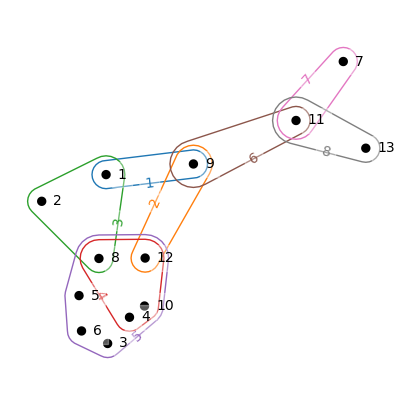

In [19]:
draw(h, HyperNetX; width=5, height=5, no_border=true)

In [20]:
h.v2he

13-element Vector{Dict{Int64, Float64}}:
 Dict(3 => 1.0, 1 => 1.0)
 Dict(3 => 1.0)
 Dict(5 => 1.0)
 Dict(5 => 1.0, 4 => 1.0)
 Dict(5 => 1.0)
 Dict(5 => 1.0)
 Dict(7 => 1.0)
 Dict(5 => 1.0, 4 => 1.0, 3 => 1.0)
 Dict(6 => 1.0, 2 => 1.0, 1 => 1.0)
 Dict(5 => 1.0, 4 => 1.0)
 Dict(6 => 1.0, 7 => 1.0, 8 => 1.0)
 Dict(5 => 1.0, 4 => 1.0, 2 => 1.0)
 Dict(8 => 1.0)

In [21]:
conductance(h, Set([1,2,3]))

3.0

In [22]:
hh = Hypergraph{Float64}(2, 3) #, v_meta = Vector{Union{Nothing,String}}(nothing, 2));
hh[1, 2:3] .= 1;
hh[2, 3] = 1;
size(hh)
hh


2×3 Hypergraph{Float64, Nothing, Nothing, Dict{Int64, Float64}}:
 nothing  1.0       1.0
 nothing   nothing  1.0

### Remember, columns are h-edges, rows are nodes.

In [23]:
#add_vertex!(hh)
add_hyperedge!(hh, vertices = Dict(1=>1.,2=>1.))
hh


2×4 Hypergraph{Float64, Nothing, Nothing, Dict{Int64, Float64}}:
 nothing  1.0       1.0  1.0
 nothing   nothing  1.0  1.0

In [24]:
add_hyperedge!(hh)
hh

2×5 Hypergraph{Float64, Nothing, Nothing, Dict{Int64, Float64}}:
 nothing  1.0       1.0  1.0  nothing
 nothing   nothing  1.0  1.0  nothing

In [25]:
# add a new vertex with 
add_vertex!(hh, hyperedges=Dict(1 => 1., 2 => 1.))
# This added a new row at the bottom 
# if we need to add  vertex v to hedge e we just change hh[e,v] (which should be nothing). 
# add vertex 5 to edges 1 and 3
for i in (1,3)
    hh[i,5] = 1.
end
hh

3×5 Hypergraph{Float64, Nothing, Nothing, Dict{Int64, Float64}}:
  nothing  1.0       1.0       1.0       1.0
  nothing   nothing  1.0       1.0        nothing
 1.0       1.0        nothing   nothing  1.0

In [26]:
# hyperedge(i)= hh[:, 1]
hh[:, 1]
he = HyperEdge{Int64}(hh,1)
#he2 = HyperEdge(hh, 1) # doesnt work
@show typeof(he.nodes), typeof( hh[:, 1])
@show he
@show gethyperedges(hh, 1)
hh

(typeof(he.nodes), typeof(hh[:, 1])) = (Dict{Int64, Float64}, Vector{Union{Nothing, Float64}})
he = HyperEdge{Int64}(1, Dict(3 => 1.0))
gethyperedges(hh, 1) = Dict(5 => 1.0, 4 => 1.0, 2 => 1.0, 3 => 1.0)


3×5 Hypergraph{Float64, Nothing, Nothing, Dict{Int64, Float64}}:
  nothing  1.0       1.0       1.0       1.0
  nothing   nothing  1.0       1.0        nothing
 1.0       1.0        nothing   nothing  1.0

In [27]:
@show hh[1,2]  
@show nhe(hh),nhv(hh)
# add a hyperedge which contains node 2
hh[end,end] =1
hh[2,1] = 1



hh[1, 2] = 1.0
(nhe(hh), nhv(hh)) = (5, 3)


1

In [28]:
add_vertex!(hh, hyperedges=Dict(1 => 1., 2 => 1.))
hh

4×5 Hypergraph{Float64, Nothing, Nothing, Dict{Int64, Float64}}:
  nothing  1.0       1.0       1.0       1.0
 1.0        nothing  1.0       1.0        nothing
 1.0       1.0        nothing   nothing  1.0
 1.0       1.0        nothing   nothing   nothing

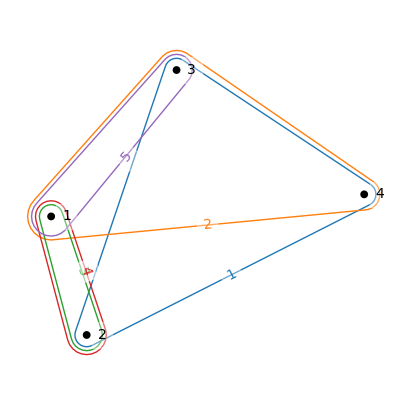

In [29]:
draw(hh, HyperNetX; width=5, height=5, no_border=true)

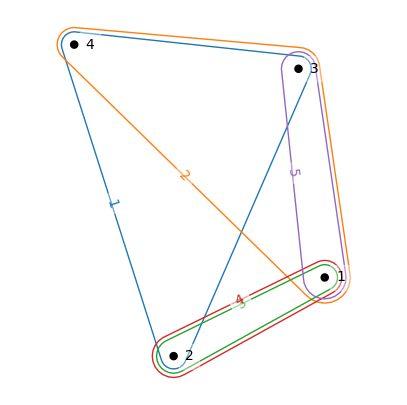

In [30]:
draw(hh, HyperNetX; width=5, height=5, no_border=false)

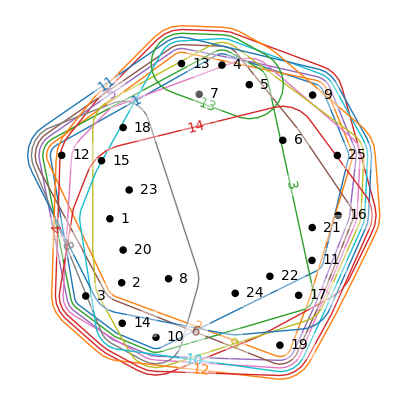

In [31]:
h_rand = random_model(25,14)
draw(h_rand, HyperNetX; width=5, height=5, no_border=false)

## Open some HPRA data files

In [32]:
using MAT
hpradatadir = projectdir("HyperedgePrediction/dataset_utils/Datasets")

citeseer1 = matread( joinpath(hpradatadir, "citeseer_coreference.mat") )
citeseer2 = matread( joinpath(hpradatadir, "citeseer_cocitation.mat") )

Dict{String, Any} with 2 entries:
  "S"         => sparse([1, 2, 1, 3, 4, 5, 6, 1, 7, 1  …  305, 1012, 671, 1013,…
  "index_map" => Dict{String, Any}("brown98utility"=>434, "hattori99socialware"…

In [33]:
keys(citeseer1)

KeySet for a Dict{String, Any} with 2 entries. Keys:
  "S"
  "index_map"

In [34]:
keys(citeseer2)

KeySet for a Dict{String, Any} with 2 entries. Keys:
  "S"
  "index_map"

In [35]:
c1 = citeseer1["S"] # this is just a shortcut
c2 = citeseer2["S"]
c1[1:20,1:10]

20×10 SparseArrays.SparseMatrixCSC{Float64, Int64} with 20 stored entries:
⎡⡇⠀⠀⠀⠀⎤
⎢⡇⠀⠀⠀⠀⎥
⎢⢇⠀⠀⠀⠀⎥
⎢⠘⡄⠀⠀⠀⎥
⎣⠀⢸⠀⠀⠀⎦

In [36]:
c1

1299×626 SparseArrays.SparseMatrixCSC{Float64, Int64} with 2886 stored entries:
⎡⢧⠶⡄⠪⡰⠒⡚⣴⠄⠶⠢⠔⡒⡀⢄⢶⣪⠂⠆⠆⠀⡒⢂⡃⠄⎤
⎢⠸⡧⢲⡴⠀⠅⠚⠨⢠⠍⢁⠆⠰⠮⡷⠀⠓⠁⢱⡄⡎⢨⣬⠩⠀⎥
⎢⠀⢻⡨⠀⢔⡡⣆⠄⣌⢜⡚⣤⡿⡣⠸⡊⢁⡓⡠⠘⠠⠀⠄⡈⣈⎥
⎢⠀⠸⣤⢩⣀⣗⡿⡀⠠⣨⢡⡴⣥⣬⠆⡉⢠⡅⠵⠃⢀⢙⠴⠁⡉⎥
⎢⠀⠀⢳⡤⡘⠬⣡⠤⢰⢠⣩⢰⢀⠀⠢⠅⠀⣖⣤⢀⠑⠣⡀⢁⢢⎥
⎢⠀⠀⠈⢷⢇⢱⡝⡀⢸⣰⠽⣉⡲⣲⡍⡨⠈⡁⠂⡈⠀⠃⡁⠂⢂⎥
⎢⠀⠀⠀⠘⣆⡰⠈⡂⠄⢬⢀⢉⡀⢀⢕⠁⠠⡀⠁⠱⡤⣸⡹⡀⡕⎥
⎢⠀⠀⠀⠀⠸⡅⣴⢔⣠⣄⡲⠨⡆⡦⠐⣞⠀⡀⡔⡟⠇⠙⠰⢊⣒⎥
⎢⠀⠀⠀⠀⠀⢹⡵⠆⡔⡝⣀⣰⠧⠃⠀⠣⠒⠙⠣⡀⠀⠉⡞⠄⠩⎥
⎢⠀⠀⠀⠀⠀⠀⢳⠘⣗⢼⢣⠄⠁⡄⢰⠞⢁⠑⠡⠀⢪⢀⠃⠀⢚⎥
⎢⠀⠀⠀⠀⠀⠀⠘⣇⢌⣼⣘⢫⡄⢰⡈⢁⣴⡁⣍⢨⠀⣀⢌⡀⠫⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠸⣜⡈⠈⠈⡀⠀⢁⡑⠊⠠⡍⠀⠹⢃⡳⡀⠈⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠹⣴⠱⡰⠄⠒⡠⡁⡀⠥⡢⠱⢀⠠⢰⣄⡐⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⢰⠐⠀⡀⠨⠂⣠⡇⢉⠡⠀⠀⠲⣠⠐⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⣎⠨⠢⠐⡤⡧⠞⠀⠀⢀⢄⠀⠩⡀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠸⣄⣁⠁⠇⠀⡀⠁⠐⢄⡄⠨⠄⠐⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠸⡄⠀⠸⠊⠗⠰⠄⠂⣊⠀⠀⡄⠂⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⣦⠑⠄⡐⠌⡊⠈⠀⠆⣄⠐⠈⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢺⣋⠐⡥⡊⠠⠸⠡⠀⠀⢂⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢹⡧⠀⠀⠴⠺⡂⡀⢀⠇⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢳⡀⣐⢁⢊⠀⠀⠴⠡⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⣆⠉⠴⢄⠑⠠⠁⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⡩⠂⣋⠅⠠⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢻⠀⢀⠀⠁⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠢⡅⠄⠀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⎦

In [37]:
c2

1016×817 SparseArrays.SparseMatrixCSC{Float64, Int64} with 2794 stored entries:
⎡⢧⡀⠂⠄⠐⢦⢶⣤⣦⠁⡖⣶⡶⣦⣰⢤⢐⡱⢲⣦⢦⠶⣦⠤⠡⠤⠌⠤⠤⢂⠤⡄⠢⠤⠀⢆⠆⠂⠄⠄⎤
⎢⢸⡇⠀⡁⠂⢄⡈⢁⣀⠤⠀⠡⡰⡉⠀⠂⠦⠀⠁⠀⢀⠀⠀⠀⠀⠀⠀⠀⠠⠀⢆⠀⠀⠈⠁⠈⠁⠀⠀⠀⎥
⎢⠀⢳⡀⢀⢀⠀⠑⠂⠀⣀⠀⢠⢂⠀⠂⠴⠀⠀⠀⡴⠊⠀⠀⡀⠆⠀⠀⠀⠐⠂⢀⠠⠀⡁⠄⠰⢒⠐⠀⠂⎥
⎢⠀⠀⢧⡄⡁⠂⠀⠀⡀⢀⠀⠀⠀⠀⠂⠀⠀⠀⠆⠀⠀⠀⠀⠀⠢⠀⠰⠀⠀⠂⠆⠐⠐⠀⠲⠒⠒⠒⠔⠂⎥
⎢⠀⠀⠈⣇⡉⠀⠠⠼⣥⠈⠌⠐⠀⠶⠄⢀⡀⠄⠂⠀⠀⠠⠀⡀⠀⠀⠀⠀⠀⠀⠐⠀⠀⠩⠀⠀⠁⠀⠀⠀⎥
⎢⠀⠀⠀⠈⢳⢠⠠⠀⢄⡈⠴⠈⠄⠠⠉⢅⠰⠀⠨⠄⢀⠠⠤⠬⠀⠠⢅⠠⠀⡀⠗⢀⠀⠓⠈⠀⠀⠄⣉⠀⎥
⎢⠀⠀⠀⠀⠈⢧⠐⢀⠛⠠⠯⠄⢐⡄⡀⠙⠠⠰⠠⡤⠈⠹⠨⡨⡀⠎⢃⠟⠣⠀⠅⠜⠈⠆⠆⠇⠈⠀⡀⠀⎥
⎢⠀⠀⠀⠀⠀⠘⣧⠀⡀⠀⠀⣡⠆⠀⠀⠘⠡⢠⠀⠛⠧⢠⡘⠀⠤⠁⠀⠀⠠⠀⠀⠁⠐⠁⠤⠄⡀⠁⡈⠐⎥
⎢⠀⠀⠀⠀⠀⠀⠈⠻⣄⠀⡤⠄⢀⠶⠀⠈⠡⠂⠀⠠⢀⡥⠁⡠⠀⢠⠄⠀⠂⠀⠀⠀⠐⡴⡁⠀⠐⠀⠆⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⢳⡀⠄⢈⡄⠄⠀⠐⡀⠀⣐⠤⢠⠍⢰⡁⡀⡀⠦⠀⢀⡀⠂⢀⡈⠺⢀⡀⠀⠄⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠳⡤⡐⢂⡀⠄⠁⠡⠀⠁⣀⡈⡀⣤⣀⠐⢂⡀⡀⣄⠐⢩⢀⢀⠀⠀⡡⠀⠆⠀⠂⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⣤⢀⠀⠀⠠⠨⠀⠀⠀⣀⠍⠩⠉⠠⠀⠁⠀⠅⠐⠀⡈⠀⠀⠄⢀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠸⡄⠡⠀⠧⠄⠀⢀⠀⠀⠀⠄⠠⠈⠀⠠⠀⠀⡀⡔⠈⣄⠂⠩⡄⡰⢠⠤⠥⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⣁⢀⠁⠀⠐⠀⡈⠃⠀⠀⠐⠂⠠⠀⠀⠈⠈⠀⠆⠀⠀⢀⠠⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⣎⡀⠂⠊⠀⠀⠀⠀⠠⡰⠀⠠⠄⠠⠀⠀⠀⢈⠀⠁⠈⠀⠁⠌⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢧⡥⠀⠀⠰⠁⠀⠄⠀⠀⠀⡁⠀⠰⠂⠀⡲⠀⠀⠀⠂⠀⣄⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠻⣌⠀⠀⠂⠀⠀⠐⠀⠑⠀⠀⠀⠀⡀⠄⠈⡐⠀⡠⢁⠠⠐⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠢⣔⠠⠐⠠⢁⡂⠀⠀⠘⠠⠀⠄⠀⠀⠀⠄⠀⠈⠄⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠓⣆⠄⠒⠠⠄⠀⠐⠈⠀⠀⠀⠁⠀⠀⠀⠄⠐⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣄⠄⠊⠂⠀⠀⠀⠄⠢⠀⠐⠤⠠⠬⠠⠄⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠓⠲⣄⡄⠀⠐⠒⠐⠁⡈⠀⢘⠀⡀⢒⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀

In [38]:
Hcitecoref = Hypergraph{Float64}(size(c1)...)  # size(c1) = (1299, 626)
nonzeros = findall(!=(0.0), c1) # Why not use c1, which  is a swallow copy of citeseer1["S"]
Hcitecoref[nonzeros] .= 1.;
hg = deepcopy(Hcitecoref);

In [39]:
# this is not very illuminating...
#draw(Hcitecoref, HyperNetX; width=18, height=20, no_border=true)

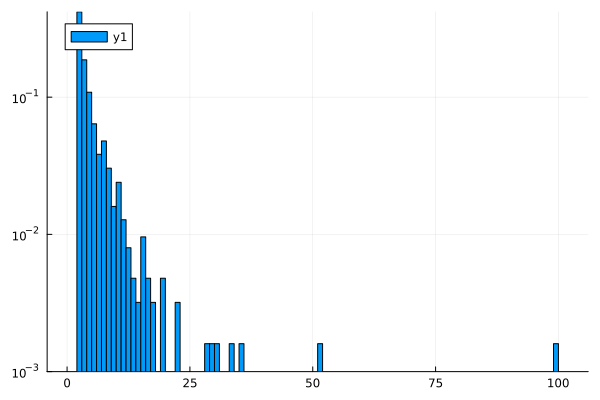

In [40]:
# The distribution of hyperdge |e|
hydist = hyperedge_dist(Hcitecoref).vect
size(hydist), typeof(hydist)
histogram(hydist, bins=minimum(hydist):(maximum(hydist)+1), yscale=:log10,normalize=:probability) 

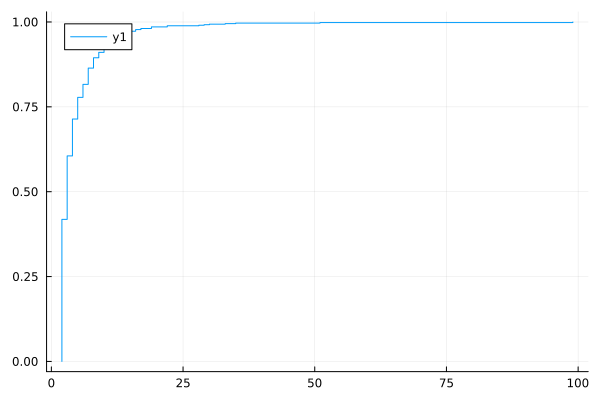

In [41]:
using StatsBase
plot(ecdf(hydist))

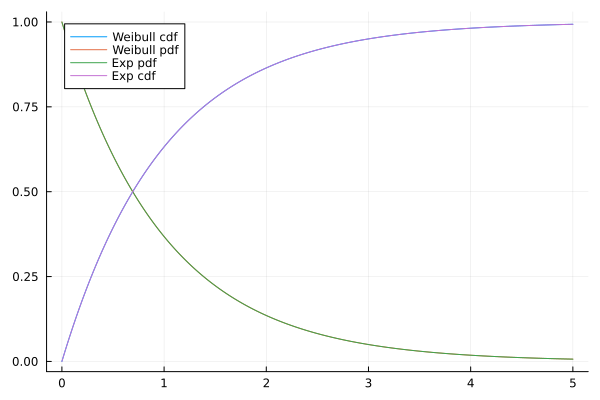

In [42]:
xx = [0:0.001:5]
plot(xx, cdf.(Weibull(), xx), label="Weibull cdf")
plot!(xx, pdf.(Weibull(), xx), label="Weibull pdf")
plot!(xx, pdf.(Exponential(), xx), label="Exp pdf")
plot!(xx, cdf.(Exponential(), xx), label="Exp cdf")

In [43]:
# For the time being we use the wweibull (not a good match) in order to get the results
hyfitW = StatsBase.fit(Weibull, hydist)
hyfit = StatsBase.fit(Exponential, hydist)
StatsBase.params(hyfit), StatsBase.params(hyfitW) #shape(hyfit), scale(hyfit)
#typeof(hydist), size(hydist)

((4.610223642172524,), (1.189395763160245, 4.962485963515348))

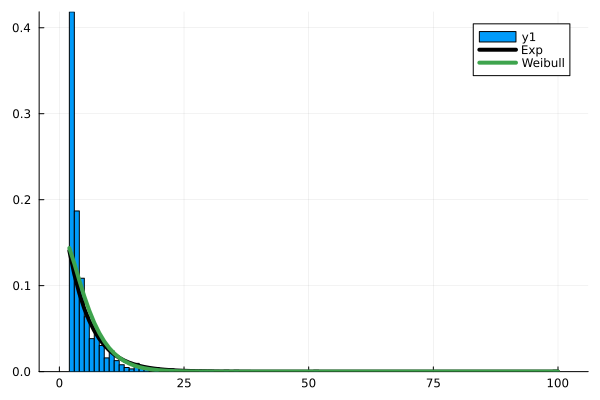

In [44]:
mybins = minimum(hydist):(maximum(hydist)+1)
histogram(hydist, bins=mybins, normalize=:pdf) #probability)

plot!(mybins, pdf.(hyfit, mybins), linewidth=4, linecolor=:black, label= "Exp")#, yscale=:log10)
plot!(mybins, pdf.(hyfitW, mybins), linewidth=4, label="Weibull")#, yscale=:log10) # linecolor=:black)

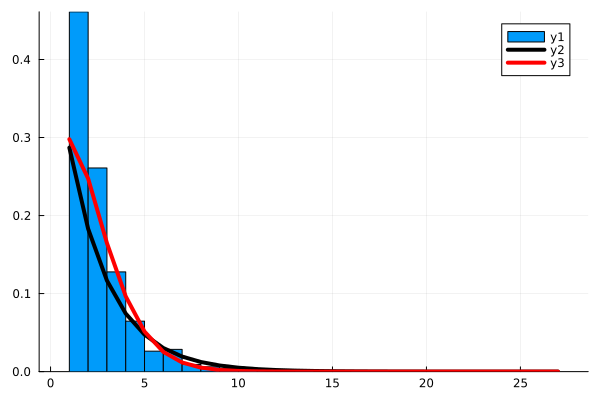

In [45]:
# Do the same for the nodes.
nodedist = length.(Hcitecoref.v2he)
nodebins = minimum(nodedist):(maximum(nodedist)+1)
histogram(nodedist, bins=nodebins, normalize=:pdf) #, yscale=:log10) #, normalize=:probability)
# do we need a fit of some kind?
nodefitW = StatsBase.fit(Weibull, nodedist)
nodefit = StatsBase.fit(Exponential, nodedist)
StatsBase.params(nodefit)
plot!(nodebins, pdf.(nodefit, nodebins), linewidth=4, linecolor=:black)
plot!(nodebins, pdf.(nodefitW, nodebins), linewidth=4, linecolor=:red)


But in the case of nodes we are interested in "preferential
attachment, i.e., nodes with a higher degree are more
likely to form new links. Following this, once the cardinality d of new hyperedge is determined, we choose
the first member of the hyperedge with probability
proportional to the node degrees.''


In [46]:
pooldensity = nodedist |> unique |> sort
pool = Vector{Int}(undef,0);


In [47]:
# poor man's weighted distribution.
# oool contains node degrees. It contains n elements with value n, eg there are 5 fives and 7 sevens
# so that when we sample it, the probability to choose degree d will be proportional to the degree.
for i in pooldensity
    for j in 1:i
        push!(pool,i)
    end
end


In [48]:

# create the sampler
nodeSpl = Spl(pool)
# use it like this:
rand(nodeSpl)

1-element Vector{Int64}:
 3

In [ ]:
# Get a dict degree => Vector(nodes with this degree) 
# For a particular degree we can choose a node  
nbd = nodes_by_degree(Hcitecoref)
# sanity: this must be the same lenght as the uniqy elements in nodeist 
@assert ( nodedist |> unique |> length )  == length( nbd ) 

# for degree d we can choose a random node as follows:
d = 10.
rand(nbd[d],3)

3-element Vector{Int64}:
  21
 505
 505

### Algorithm 1: Hyperedge Prediction using Resource Al-location (HPRA)

- Input: Hypergraph Incidence Matrix H, Node set V,
Hyperedge Degree Distribution HDD
- Output: Predicted Hyperedge e

1. `` Sample hyperedge degree from HDD ``
2. ``d ← get_degree(hyperedge_degrees, prob = H DD)``
3. ``// Initialize hyperedge e ``
4. ``e ← {} `` 
5. ``// Select first node using Preferential Attachment``
6. ``vnew = get_node(V , prob = node_degrees)``
7. ``e.add(v new )``
8. ``while size(e) < d do``
9. ``// Compute NHAS for remaining nodes`` (See Algo 2)
10.  ``scores ← NHAS( e, V )``
11. ``// Select a node based on NHAS``
12. ``v ← get_node(V , prob = scores)``
13. ``e.add(v)``
14. ``end``

### Algorithm 2: Node-Hyperedge Attachment Scores
- Input: Edge e, Node set V, HRA score matrix HRA
- Output: Node-Hyperedge Attachment Scores scores)
1.  ``// Initialize scores``
2. $scores ← zeroes(size(V))$
3. ``// Compute NHAS for each node in`` $V$\ $e$
4. ``for`` $v_i$ ``in ``$V$ ``do``
5. <code>&nbsp;&nbsp;</code>``if `` $v_i$ ``not in`` $e$ ``then``
6.  <code>&nbsp;&nbsp;&nbsp;&nbsp;</code>  ``for`` $v_j$ ``in`` $e$ ``do``
7.   <code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code> $scores[i] ← scores[i] + HRA(v_i , v_j )$
8.  <code>&nbsp;&nbsp;&nbsp;&nbsp;</code> ``end``
9. <code>&nbsp;&nbsp;&nbsp;&nbsp;</code> $scores[i] ← \frac{1}{size(e)} ∗ (scores[i])$      
10. <code> &nbsp;&nbsp;</code>``end``
11.   ``end``

## To Be Done

- P - Set of To Be Predicted Hyperegdes
- V - Set of nodes


For $q \geq 1, q\in \mathbb{Z} $

$P_q = \{x \in 2^V : |x| = q\}$

 $|P_q| =  { n \choose q }$,  where $n =|V|$ 
 
 (Cardinality) 

#### A Observations -- Training set
Random Hypergraph A with args:
- No of nodes ~ 30
- No of hyperedges  ~ 10-20
- Min max of nodes in each hyperedge min ~ 1- 3 , max ~ 4-8

#### B Predictions -- Test set
To be predicted hypergraph B with args:
- The same nodes as in A
- No of hyperedges  ~ 3 - 6
- Min max of nodes in each hyperedge min ~ 1-3 , max ~ 4-8

A Hyperedge with $n$ nodes corresponds to:
- $n$-clique (Hypergraphs)
- $(n-1)$-simplex  (Simplicial complexes)

In [ ]:
# how many edges and nodes?

nhe(Hcitecoref), nhv(Hcitecoref)

(626, 1299)

In [54]:
setOfEdges = []
tot_n = 20
#Threads.@threads 
@time for i in 1:tot_n
    new_Hedge = create_new_hyperedge(Hcitecoref)
    @show new_Hedge

    h_edge_in_cont(setOfEdges, new_Hedge[1])
    # if i%10 == 0 
    #     println("------   ",i)
    # end
end
println("After $(tot_n) tries, got $(length(setOfEdges)) different h-edges")

new_Hedge = HyperEdge[HyperEdge{Int64}(627, Dict(630 => 1.0, 695 => 1.0, 622 => 1.0, 154 => 1.0, 487 => 1.0, 604 => 1.0, 664 => 1.0, 686 => 1.0, 507 => 1.0, 750 => 1.0, 71 => 1.0, 505 => 1.0, 665 => 1.0, 680 => 1.0, 1240 => 1.0, 506 => 1.0, 605 => 1.0))]
new_Hedge = HyperEdge[HyperEdge{Int64}(627, Dict(691 => 1.0, 144 => 1.0))]
new_Hedge = HyperEdge[HyperEdge{Int64}(627, Dict(1169 => 1.0, 1168 => 1.0, 556 => 1.0))]
new_Hedge = HyperEdge[HyperEdge{Int64}(627, Dict(624 => 1.0, 749 => 1.0, 398 => 1.0))]
new_Hedge = HyperEdge[HyperEdge{Int64}(627, Dict(500 => 1.0, 624 => 1.0, 237 => 1.0, 235 => 1.0))]
new_Hedge = HyperEdge[HyperEdge{Int64}(627, Dict(985 => 1.0, 161 => 1.0, 12 => 1.0, 410 => 1.0))]
new_Hedge = HyperEdge[HyperEdge{Int64}(627, Dict(149 => 1.0, 148 => 1.0))]
new_Hedge = HyperEdge[HyperEdge{Int64}(627, Dict(177 => 1.0, 479 => 1.0))]
new_Hedge = HyperEdge[HyperEdge{Int64}(627, Dict(235 => 1.0, 676 => 1.0))]
new_Hedge = HyperEdge[HyperEdge{Int64}(627, Dict(392 => 1.0, 174 => 1.0,

In [55]:
setOfEdges = []
tot_n = 10
#Threads.@threads 
@time begin 
    new_Hedges = create_new_hyperedge(Hcitecoref, n=tot_n)
    foreach(new_Hedges) do x 
        h_edge_in_cont(setOfEdges, x)
    end
end
println("After $(tot_n) tries, got $(length(setOfEdges)) different h-edges")

  0.312910 seconds (4.65 M allocations: 279.853 MiB, 21.66% gc time, 7.25% compilation time)
After 10 tries, got 10 different h-edges


In [99]:
hhh =  deepcopy(hh)
new_hhh = create_new_hyperedge(hhh)[1]
@show new_hhh

# for i in 1:10
#     new_hhh = create_new_hyperedge(hhh)
#     @show new_hhh
# end
setOfhhh = []
for i in 1:1000
    new_hhh = create_new_hyperedge(hhh)[1]
    #@show new_Hedge
    h_edge_in_cont(setOfhhh, new_hhh)
end
length(setOfhhh)
#setOfhhh

new_hhh = HyperEdge{Int64}(6, Dict(4 => 1.0, 3 => 1.0, 1 => 1.0))


10

We can add a new hyperedge to the hypergraph

In [57]:
add_hyperedge!(hhh, setOfhhh[end])
hhh

4×6 Hypergraph{Float64, Nothing, Nothing, Dict{Int64, Float64}}:
  nothing  1.0       1.0       1.0       1.0        nothing
 1.0        nothing  1.0       1.0        nothing  1.0
 1.0       1.0        nothing   nothing  1.0       1.0
 1.0       1.0        nothing   nothing   nothing  1.0

In [58]:
# play w/ the Hypergraph
@show size(Hcitecoref), size(hg), length(hg.he2v)
#Hcitecoref[newV_idx, new_HEdege.e_id] = 1.0 ##  or weight
succ = add_hyperedge!(hg, setOfEdges[3])
size(Hcitecoref), size(hg)

(size(Hcitecoref), size(hg), length(hg.he2v)) = ((1299, 626), (1299, 626), 626)


((1299, 626), (1299, 627))

In [68]:
hhh_hg = Hypergraph(hhh)
display(hhh_hg)
m = FScore(levels=[0, 1], checks=false)

he = HyperEdge{Int64}(hhh_hg, 1)
a = HE2Vect(he, nhv(hhh_hg))
for d in 2:nhe(hhh_hg)
    b = HE2Vect(HyperEdge{Int64}(hhh_hg, d), 4)
    @show d, m(a, b)
end


4×6 Hypergraph{Float64, Nothing, Nothing, Dict{Int64, Float64}}:
  nothing  1.0       1.0       1.0       1.0        nothing
 1.0        nothing  1.0       1.0        nothing  1.0
 1.0       1.0        nothing   nothing  1.0       1.0
 1.0       1.0        nothing   nothing   nothing  1.0

(d, m(a, b)) = (2, 0.6666666666666666)
(d, m(a, b)) = (3, 0.4)
(d, m(a, b)) = (4, 0.4)
(d, m(a, b)) = (5, 0.4)
(d, m(a, b)) = (6, 1.0)


In [69]:
a=nodes_degree(hhh_hg)

4-element Vector{Float64}:
 4.0
 4.0
 4.0
 3.0

In [70]:
# reminder about reduce
a=[1 1 1; 2 2 2]
reduce(+, a, dims=1), reduce(+, a, dims=2)

([3 3 3], [3; 6;;])

In [71]:
h_rand = random_model(4,22)
@show size(h_rand)[1]
a_rand_hg = replace(h_rand, true => 1.0)
# for j in 26:28
#     a_rand_hg[1,j] = nothing
# end
# for j in 1:24
#     a_rand_hg[4, j] = nothing
# end
a_rand_hg = Hypergraph(a_rand_hg)


(size(h_rand))[1] = 4


4×22 Hypergraph{Float64, Nothing, Nothing, Dict{Int64, Float64}}:
  nothing  1.0  1.0  1.0       1.0       …  1.0   nothing   nothing  1.0
 1.0       1.0  1.0   nothing  1.0          1.0  1.0       1.0        nothing
  nothing  1.0  1.0   nothing   nothing     1.0  1.0        nothing  1.0
 1.0       1.0  1.0   nothing  1.0          1.0   nothing   nothing   nothing

In [72]:
a_rand_hg

4×22 Hypergraph{Float64, Nothing, Nothing, Dict{Int64, Float64}}:
  nothing  1.0  1.0  1.0       1.0       …  1.0   nothing   nothing  1.0
 1.0       1.0  1.0   nothing  1.0          1.0  1.0       1.0        nothing
  nothing  1.0  1.0   nothing   nothing     1.0  1.0        nothing  1.0
 1.0       1.0  1.0   nothing  1.0          1.0   nothing   nothing   nothing

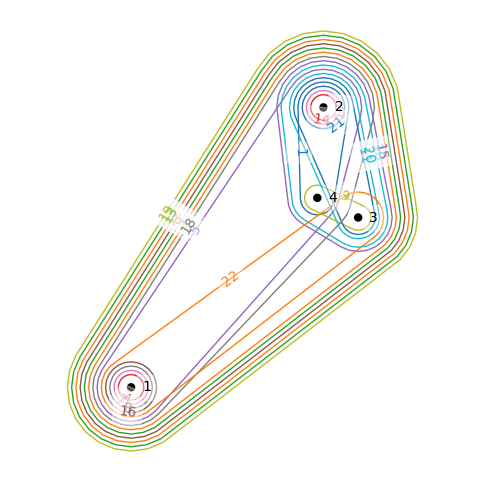

In [73]:
draw(a_rand_hg, HyperNetX; width=6, height=6)

However, this approach has a limitation that after splitting
the hyperedge set, few nodes may not be connected to any
other node in the $E^T$. It is not practical to expect the method
to predict hyperedges having such nodes. Therefore, we remove these hyperedges from $E^M$.

$\bold{ Question: }$ Shouldn't we remove the nodes also? 

- No. The node row is empty, therefore it does not contribute at all to the calculation, so we don't need to remove it. 


In [173]:
function foldem(hyperg::Hypergraph, fold_k)
    """
    Perform the k-fold cross validation. 
    After partitioning the h-edges of the h-graph into k subsets, we loop over them,
    identifying them as E^T (training) and E^M (missing) sets. 
    There may exist cases where E^T does not contain some node, ie contains empty hyperedges, 
    The relevant hyperedges (including the nodes) are removed from E^M
    """


    cv = collect(kfolds(size(hyperg)[2], fold_k))
    @show length.(cv[1])

    for (k, j) in zip(cv[1], cv[2])
        # k is E^T, the training set and j the 'missing' set, E^M
        # check E^M for disconnected vertices. Return either the folded 
        # iterator if no such disconnected nodes are found, or 
        # the corrected iterator over which we are going to cross validate
        onefold = find_disconnected_he(hyperg, (k, j))
        @show onefold
        hhg = Hypergraph(hyperg[:, k])

        # Now create new h-edges for the kfold E^T hgraph, that later we will 
        # compare to onefold E^M edges. 


        new_Hedges = create_new_hyperedge(hhg, n=length(onefold))

        calc_av_F1score_matrix(new_Hedges, hyperg[:, onefold])
        println("###"^20)
    end
end
################################################3
function calc_av_F1score_matrix(Eᴾ, Eᴹ)
    """
        The 2 inputs are not of the same format. Eᴾ is a vector of hyperEdges, 
        while Eᴹ is just a view of the hypergraph, hyperg[:, onefold], the 'missing' edges 
        so some manipulation is needed.
    """
    dim = size(Eᴹ)[1]
    vsp_dim = size(Eᴾ)[1]
    # rows in hypergraph -> no of nodes, or length of the vectors
    @assert size(Eᴾ)[1] == size(Eᴹ)[2] # size of the vector space under consideration, ie no of vecs
    @show dim, size(Eᴹ)[2], size(Eᴾ)[1]
    avFscore = zeros(Float64, vsp_dim, vsp_dim)
    avFscoreReverse = zeros(Float64, vsp_dim, vsp_dim)

    j = 1
    for col in eachcol(Eᴹ)
        et = replace(col, nothing => 0.0)

        #@show et
        for (i, row) in enumerate(Eᴾ)
            #@show i, row
            ep = HE2Vect(row, dim)
            #println("$(j) new_HEdge $(row.e_id), $(i) nodes: $(ep)")
            avFscore[i, j] = m(ep, et)
            avFscoreReverse[i, j] = m(et, ep)
            # should we only keep different edges? No
            # h_edge_in_cont(new_H_Edges, new_Hedge)
        end
        j += 1
    end
    display(avFscore)
    display(avFscoreReverse)
    @assert avFscore == avFscoreReverse
end


calc_av_F1score_matrix (generic function with 1 method)

In [174]:
fold_k = 5

#h_rand = random_model(4, 20)
# --- or
h_rand = random_preferential_model(7, 0.1)
@show size(h_rand)
a_rand_hg = (replace(h_rand, true => 1.0) |> Hypergraph)
display(a_rand_hg)# @show find_empty_nodes(a_rand_hg)
# @show find_all_empty_nodes(a_rand_hg)
foldem(a_rand_hg,fold_k)
display(a_rand_hg)


size(h_rand) = (7, 17)


7×17 Hypergraph{Float64, Nothing, Nothing, Dict{Int64, Float64}}:
 1.0       1.0       1.0       1.0       …  1.0        nothing   nothing
  nothing   nothing  1.0        nothing     1.0       1.0        nothing
  nothing   nothing  1.0        nothing     1.0        nothing   nothing
  nothing   nothing  1.0       1.0          1.0        nothing  1.0
 1.0       1.0       1.0       1.0          1.0        nothing  1.0
  nothing   nothing   nothing   nothing  …  1.0        nothing   nothing
  nothing   nothing   nothing   nothing      nothing   nothing  1.0

length.(cv[1]) = [13, 13, 14, 14, 14]
is empty finder: () -> true
onefold = 1:4
(dim, (size(Eᴹ))[2], (size(Eᴾ))[1]) = (7, 4, 4)


4×4 Matrix{Float64}:
 0.0       0.0       0.333333  0.0
 0.0       0.0       0.333333  0.5
 0.0       0.0       0.333333  0.0
 0.666667  0.666667  0.333333  0.5

4×4 Matrix{Float64}:
 0.0       0.0       0.333333  0.0
 0.0       0.0       0.333333  0.5
 0.0       0.0       0.333333  0.0
 0.666667  0.666667  0.333333  0.5

############################################################
is empty finder: () -> true
onefold = 5:8
(dim, (size(Eᴹ))[2], (size(Eᴾ))[1]) = (7, 4, 4)


4×4 Matrix{Float64}:
 0.5  0.571429  0.571429  0.0
 0.5  0.571429  0.571429  0.0
 0.0  0.285714  0.285714  0.0
 0.0  0.285714  0.285714  0.4

4×4 Matrix{Float64}:
 0.5  0.571429  0.571429  0.0
 0.5  0.571429  0.571429  0.0
 0.0  0.285714  0.285714  0.0
 0.0  0.285714  0.285714  0.4

############################################################
is empty finder: () -> true
onefold = 9:11
(dim, (size(Eᴹ))[2], (size(Eᴾ))[1]) = (7, 3, 3)


3×3 Matrix{Float64}:
 0.5  0.0  0.571429
 0.5  0.5  0.857143
 0.5  0.5  0.857143

3×3 Matrix{Float64}:
 0.5  0.0  0.571429
 0.5  0.5  0.857143
 0.5  0.5  0.857143

############################################################
is empty finder: () -> true
onefold = 12:14
(dim, (size(Eᴹ))[2], (size(Eᴾ))[1]) = (7, 3, 3)


3×3 Matrix{Float64}:
 0.4  0.0  0.8
 0.4  0.0  0.4
 0.8  0.0  0.0

3×3 Matrix{Float64}:
 0.4  0.0  0.8
 0.4  0.0  0.4
 0.8  0.0  0.0

############################################################
is empty finder: (CartesianIndex(7, 1),) -> false
Node 7 is zero. Checking E^M at [3]
Hyperedges #[17] ------   Discarded
onefold = [15, 16]


LoadError: BoundsError: attempt to access 0-element Weights{Float64, Float64, Vector{Float64}} at index [1]

In [108]:
fold_k = 5
#find_all_empty_nodes(a_rand_hg)
cv = collect(kfolds(size(a_rand_hg)[2], fold_k))
#@show cv[1]
ff = a_rand_hg[:,cv[1][end]] |> find_all_empty_nodes 
@show ff, ff[1], ff[1][2]
a_rand_hg[ff[1][1], cv[1][end]] .|> !isnothing |> sum


(ff, ff[1], (ff[1])[2]) = (CartesianIndex{2}[CartesianIndex(6, 1), CartesianIndex(7, 1)], CartesianIndex(6, 1), 1)


0

In [110]:
nodes_degree(a_rand_hg)

7-element Vector{Float64}:
 15.0
 14.0
 13.0
 23.0
 15.0
  3.0
  1.0

In [113]:
a = @pipe replace(a_rand_hg, nothing => 0) |> reduce(+, _, dims=2) |> findall(==(3.), _)
a

1-element Vector{CartesianIndex{2}}:
 CartesianIndex(6, 1)

In [115]:
mat = hhh[:, [3, 4, 5]]
display(mat)
@show size(mat)
# display(map(isnothing, mat))
# bbb = @pipe map(isnothing, hhh[:, [3, 4, 5]]) |> reduce(+,_, dims=2)
# @show map(Base.notnothing, hhh[:, [3, 4, 5]]) 
# @show bbb
# for i in 1:size(mat)[1]
#     found = false
#     #for j in 1:size(mat)[2]
#     @show i , isnothing(mat[i,:])
#     @show something(mat[i,:]...)
# end
#a = @pipe replace(mat, nothing => 0) |> reduce(+, _, dims=2) |> any(==(0), _)


4×3 Matrix{Union{Nothing, Float64}}:
 1.0       1.0       1.0
 1.0       1.0        nothing
  nothing   nothing  1.0
  nothing   nothing   nothing

size(mat) = (4, 3)


(4, 3)

In [118]:
Base.notnothing([1.0,    1.0,        nothing])

3-element Vector{Union{Nothing, Float64}}:
 1.0
 1.0
  nothing

In [306]:
using MLJBase
cv = CV(nfolds=3)
MLJBase.train_test_pairs(cv, 1:15)

3-element Vector{Tuple{Vector{Int64}, UnitRange{Int64}}}:
 ([6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 1:5)
 ([1, 2, 3, 4, 5, 11, 12, 13, 14, 15], 6:10)
 ([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 11:15)

In [307]:
typeof(hh), typeof(Hcitecoref)

(Hypergraph{Float64, Nothing, Nothing, Dict{Int64, Float64}}, Hypergraph{Float64, Nothing, Nothing, Dict{Int64, Float64}})

In [308]:
train_idx, val_idx = kfolds(100, 10);
@show train_idx
val_idx


train_idx = [[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80

10-element Vector{UnitRange{Int64}}:
 1:10
 11:20
 21:30
 31:40
 41:50
 51:60
 61:70
 71:80
 81:90
 91:100

In [309]:
wdict = Dict()
foreach(x -> wdict[x] = 1.0, new_Hedge.nodes)
wdict

LoadError: UndefVarError: `new_Hedge` not defined

In [310]:
# Step 3 - 4: We get a hyperedge degree with the help of a sampler from the graph, before we add a new edge
nbd = nodes_degree(Hcitecoref)
nod = get_random_node_by_degree(nbd, 13.)
@show nod
findall(isapprox(3, atol=0.1), nbd) 

nod = 144


166-element Vector{Int64}:
   15
   18
   20
   23
   27
   34
   46
   47
   60
   66
   68
   77
   79
    ⋮
  977
  981
  992
 1003
 1004
 1041
 1059
 1070
 1089
 1134
 1139
 1165

In [67]:
#[hyperedge_dist(Hcitecoref) |> rand for i in 1:20] 
samp = hyperedge_dist(Hcitecoref)
foreach(x->println( rand(samp)[1]),1:20)

11
2
3
2
2
3
4
2
2
7
3
3
5
3
2
2
4
4
6
2


In [119]:
# step 5-6 get first node
deg_of_first_node = rand(nodeSpl)
# this is a vector w/ 1 element, so use it as in
#nbd[ deg_of_first_node[1] ]
# get a random vertex from the vec of vertices w/ deg as found
@show typeof(deg_of_first_node), typeof( nbd)
first_node = ( nbd[ deg_of_first_node[1]] |> rand )


(typeof(deg_of_first_node), typeof(nbd)) = (Vector{Int64}, Dict{Float64, Vector{Int64}})


12

In [ ]:
deg_of_first_node = rand(nodeSpl)
# this is a vector w/ 1 element, so use it as in
#nbd[ deg_of_first_node[1] ]
# get a random vertex from the vec of vertices w/ deg as found
first_node = ( nbd[ deg_of_first_node[1]] |> rand )


133

In [ ]:
# step 1 - 2
# So now we can add the new hyperdge, whcih contains the first node w/ weight 1.
add_hyperedge!(Hcitecoref, vertices=Dict(first_node => 1.))


627

In [ ]:
new_he = HyperEdge(nhe(Hcitecoref), [first_node])

NewHEdge(627, Union{Nothing, Int64}[186])

In [71]:
scores, nhas_scores = calc_NHAS_test(Hcitecoref, new_he)
sscores = calc_NHAS(Hcitecoref, new_he)

LoadError: UndefVarError: `new_he` not defined

In [ ]:
#unique(sscores)

In [ ]:
# This is the test 
a = [nhas_scores[i]  for i in h_nodes(Hcitecoref) ] |> unique |> sort
b = [scores[i]  for i in h_nodes(Hcitecoref) ] |> unique |> sort

@assert (a - b |> unique) == [0.]
# also 
@assert unique(nhas_scores - scores) == [0.]
@show length(scores), new_he.nodes


(length(scores), new_he.nodes) = (1299, Union{Nothing, Int64}[186])


(1299, Union{Nothing, Int64}[186])

In [ ]:
# Choose a node (which is not in new_he) w/ prob proportional to its score 
#indeces = collect( 1:length(scores) )
# remove all  new_he vertices
#filter!(ind -> ind ∉ new_he.nodes, indeces)
# we take a view of scores that does not contain the nodes in new_he
indeces = findall(!=(0.), scores)
scores_view = getindex(scores, indeces)

#@assert 
@assert length(scores_view) == length(indeces)
length(scores_view), length(indeces)

(335, 335)

In [ ]:
## Test
newV_idx = sample(indeces, Weights(scores_view), 100)
#sample(items, Weights(weig), 6, replace=true) |> sort
#
@assert [i for i in newV_idx if scores[newV_idx] ==0] == []

In [ ]:
newV_idx = sample(indeces, Weights(scores_view) )
println("Chose node $(newV_idx) w/ a score of $(scores[newV_idx])")

Chose node 148 w/ a score of 0.3273029556803953


In [ ]:
# This is added to the new hyperegde and to new_he ecdfplot

6

## Visualizing a hypegraph

To visualize a given hypergraph `h`, the user needs to specify two mandatory parameters:
1. the hypergraph `h` to draw
2. which method should be used to visualize `h`
    * `GraphBased` represents each hyperedge `he` with a *fake* vertex `fv` to which each vertex `v ∈ he` is connected.
    * `HyperNetX` renders an Euler diagram of the hypergraph where vertices are black dots and hyper edges are convex shapes containing the vertices belonging to the edge set. 

### A `GraphBased` visualization

#### Vertices options

* If `with_node_labels=true`, but `node_labels` is not specified, vertex ids will be used as their label.

In [ ]:
SimpleHypergraphs.draw(h, 
    GraphBased; 
    width=1000, 
    height=1500,
    radius=10, #same radius for each node
    node_color = "yellow", #same color for each node
    node_stroke="orange", #same stroke for each node
    stroke_width=2, #same stroke-width value for each node
    node_opacity=0.5, #same opacity for each node
    with_node_labels=true, #wheter displaying or not node labels
    with_node_metadata_hover=true
)

HTML{String}("    <head>\n    </head>\n\n    <div id=\"div1\"></div>\n\n    <script src=\"https://alessant.github.io/hypergraphs-drawing/hypergraphsdrawing.js\"></script>\n\n    <script>\n\n        hgd.draw(\n            [{\"3\":1.0,\"1\":1.0},{\"3\":1.0},{\"5\":1.0},{\"5\":1.0,\"4\":1.0},{\"5\":1.0},{\"5\":1.0},{\"7\":1.0},{\"5\":1.0,\"4\":1.0,\"3\":1.0},{\"6\":1.0,\"2\":1.0,\"1\":1.0},{\"5\":1.0,\"4\":1.0},{\"6\":1.0,\"7\":1.0,\"8\":1.0},{\"5\":1.0,\"4\":1.0,\"2\":1.0},{\"8\":1.0}],\n            [{\"9\":1.0,\"1\":1.0},{\"9\":1.0,\"12\":1.0},{\"2\":1.0,\"8\":1.0,\"1\":1.0},{\"4\":1.0,\"10\":1.0,\"12\":1.0,\"8\":1.0},{\"5\":1.0,\"4\":1.0,\"6\":1.0,\"10\":1.0,\"12\":1.0,\"8\":1.0,\"3\":1.0},{\"11\":1.0,\"9\":1.0},{\"7\":1.0,\"11\":1.0},{\"13\":1.0,\"11\":1.0}],\n            \"div1\",\n            vmeta=[null,null,null,null,null,null,null,null,null,null,null,null,null],\n            hemeta=[null,null,null,null,null,null,null,null],\n            width=1000,\n            height=1500,\n            strength=-60,\n            linkDistance=40,\n            linkStrength=1,\n            theta=0.8,\n            radius=10,\n            nodeRadii=null,\n            nodeColor=\"yellow\",\n            nodeColors=null,\n            nodeStroke=\"orange\",\n            nodeStrokes=null,\n            strokeWidth=2,\n            strokeWidths=null,\n            nodeOpacity=0.5,\n            nodeOpacities=null,\n            strokeOpacity=1,\n            strokeOpacities=null,\n            withNodeLabels=true,\n            nodeLabels=null,\n            nodeLabelsAttr=null,\n            nodeLabelsStyle=null,\n            withNodeMetadataOnHover=true,\n            withNodeWeight=false,\n            edgeColors=null,\n            withEdgeLabels=false,\n            edgeLabels=null,\n            withHyperedgesMetadataOnHover=false\n            );\n    </script>\n    </footer>\n")

* Different radii, colors, strokes, stroke-widths, opacities and labels can be specified for each node. If one of these parameters is specified, the corresponding default value for each vertex will be ignored.

In [ ]:
SimpleHypergraphs.draw(
    h, 
    GraphBased; 
    width=500, 
    height=500,
    radius=10, #same radius for each node
    node_color = "yellow", #same color for each node
    node_colors = ["yellow", "yellow", "yellow", "blue", "red", "red", "blue"],
    node_stroke = "orange", #same stroke for each node
    node_strokes =  ["orange", "orange", "orange", "orange", "black", "black", "black"],
    stroke_width=2, #same stroke-width value for each node
    node_opacity=0.5, #same opacity for each node
    with_node_labels=true, #whether displaying or not node labels
    node_labels=["A","B","C","D","E","F","G"],
    with_node_metadata_hover=true,
)

HTML{String}("    <head>\n    </head>\n\n    <div id=\"div2\"></div>\n\n    <script src=\"https://alessant.github.io/hypergraphs-drawing/hypergraphsdrawing.js\"></script>\n\n    <script>\n\n        hgd.draw(\n            [{\"3\":1.0,\"1\":1.0},{\"3\":1.0},{\"5\":1.0},{\"5\":1.0,\"4\":1.0},{\"5\":1.0},{\"5\":1.0},{\"7\":1.0},{\"5\":1.0,\"4\":1.0,\"3\":1.0},{\"6\":1.0,\"2\":1.0,\"1\":1.0},{\"5\":1.0,\"4\":1.0},{\"6\":1.0,\"7\":1.0,\"8\":1.0},{\"5\":1.0,\"4\":1.0,\"2\":1.0},{\"8\":1.0}],\n            [{\"9\":1.0,\"1\":1.0},{\"9\":1.0,\"12\":1.0},{\"2\":1.0,\"8\":1.0,\"1\":1.0},{\"4\":1.0,\"10\":1.0,\"12\":1.0,\"8\":1.0},{\"5\":1.0,\"4\":1.0,\"6\":1.0,\"10\":1.0,\"12\":1.0,\"8\":1.0,\"3\":1.0},{\"11\":1.0,\"9\":1.0},{\"7\":1.0,\"11\":1.0},{\"13\":1.0,\"11\":1.0}],\n            \"div2\",\n            vmeta=[null,null,null,null,null,null,null,null,null,null,null,null,null],\n            hemeta=[null,null,null,null,null,null,null,null],\n            width=500,\n            height=500,\n            strength=-60,\n            linkDistance=40,\n            linkStrength=1,\n            theta=0.8,\n            radius=10,\n            nodeRadii=null,\n            nodeColor=\"yellow\",\n            nodeColors=[\"yellow\",\"yellow\",\"yellow\",\"blue\",\"red\",\"red\",\"blue\"],\n            nodeStroke=\"orange\",\n            nodeStrokes=[\"orange\",\"orange\",\"orange\",\"orange\",\"black\",\"black\",\"black\"],\n            strokeWidth=2,\n            strokeWidths=null,\n            nodeOpacity=0.5,\n            nodeOpacities=null,\n            strokeOpacity=1,\n            strokeOpacities=null,\n            withNodeLabels=true,\n            nodeLabels=[\"A\",\"B\",\"C\",\"D\",\"E\",\"F\",\"G\"],\n            nodeLabelsAttr=null,\n            nodeLabelsStyle=null,\n            withNodeMetadataOnHover=true,\n            withNodeWeight=false,\n            edgeColors=null,\n            withEdgeLabels=false,\n            edgeLabels=null,\n            withHyperedgesMetadataOnHover=false\n            );\n    </script>\n    </footer>\n")

* If `with_node_weight=true`, each vertex weight within the hyperedges it belongs to will be displayed.

In [ ]:
SimpleHypergraphs.draw(
    h, 
    GraphBased; 
    width=500, 
    height=500,
    radius=10, #same radius for each node
    node_color = "yellow", #same color for each node
    node_stroke="orange", #same stroke for each node
    stroke_width=2, #same stroke-width value for each node
    node_opacity=0.5, #same opacity for each node
    with_node_labels=true, #whether displaying or not node labels
    node_labels=["A","B","C","D","E","F","G"],
    with_node_metadata_hover=true,
    with_node_weight=true
)

HTML{String}("    <head>\n    </head>\n\n    <div id=\"div3\"></div>\n\n    <script src=\"https://alessant.github.io/hypergraphs-drawing/hypergraphsdrawing.js\"></script>\n\n    <script>\n\n        hgd.draw(\n            [{\"3\":1.0,\"1\":1.0},{\"3\":1.0},{\"5\":1.0},{\"5\":1.0,\"4\":1.0},{\"5\":1.0},{\"5\":1.0},{\"7\":1.0},{\"5\":1.0,\"4\":1.0,\"3\":1.0},{\"6\":1.0,\"2\":1.0,\"1\":1.0},{\"5\":1.0,\"4\":1.0},{\"6\":1.0,\"7\":1.0,\"8\":1.0},{\"5\":1.0,\"4\":1.0,\"2\":1.0},{\"8\":1.0}],\n            [{\"9\":1.0,\"1\":1.0},{\"9\":1.0,\"12\":1.0},{\"2\":1.0,\"8\":1.0,\"1\":1.0},{\"4\":1.0,\"10\":1.0,\"12\":1.0,\"8\":1.0},{\"5\":1.0,\"4\":1.0,\"6\":1.0,\"10\":1.0,\"12\":1.0,\"8\":1.0,\"3\":1.0},{\"11\":1.0,\"9\":1.0},{\"7\":1.0,\"11\":1.0},{\"13\":1.0,\"11\":1.0}],\n            \"div3\",\n            vmeta=[null,null,null,null,null,null,null,null,null,null,null,null,null],\n            hemeta=[null,null,null,null,null,null,null,null],\n            width=500,\n            height=500,\n            strength=-60,\n            linkDistance=40,\n            linkStrength=1,\n            theta=0.8,\n            radius=10,\n            nodeRadii=null,\n            nodeColor=\"yellow\",\n            nodeColors=null,\n            nodeStroke=\"orange\",\n            nodeStrokes=null,\n            strokeWidth=2,\n            strokeWidths=null,\n            nodeOpacity=0.5,\n            nodeOpacities=null,\n            strokeOpacity=1,\n            strokeOpacities=null,\n            withNodeLabels=true,\n            nodeLabels=[\"A\",\"B\",\"C\",\"D\",\"E\",\"F\",\"G\"],\n            nodeLabelsAttr=null,\n            nodeLabelsStyle=null,\n            withNodeMetadataOnHover=true,\n            withNodeWeight=true,\n            edgeColors=null,\n            withEdgeLabels=false,\n            edgeLabels=null,\n            withHyperedgesMetadataOnHover=false\n            );\n    </script>\n    </footer>\n")

#### Hyperedges options

In [ ]:
draw(
    h, 
    GraphBased; 
    width=500, 
    height=500,
    radius=10, #same radius for each node
    node_color = "yellow", #same color for each node
    node_stroke="orange", #same stroke for each node
    stroke_width=2, #same stroke-width value for each node
    node_opacity=0.5, #same opacity for each node
    with_node_labels=true, #whether displaying or not node labels
    with_node_metadata_hover=true,
    with_node_weight=true, #whether displaying vertices metadata on mouse hover
    he_colors=["green", "blue", "red", "yellow","black"], #hyperedges colors
    with_he_labels=true, #whether displaying or not hyperedge labels
    he_labels=["a","b","c","d"], #hyperedges labels
    with_he_metadata_hover=true #whether displaying hyperedges metadata on mouse hover
)

HTML{String}("    <head>\n    </head>\n\n    <div id=\"div4\"></div>\n\n    <script src=\"https://alessant.github.io/hypergraphs-drawing/hypergraphsdrawing.js\"></script>\n\n    <script>\n\n        hgd.draw(\n            [{\"3\":1.0,\"1\":1.0},{\"3\":1.0},{\"5\":1.0},{\"5\":1.0,\"4\":1.0},{\"5\":1.0},{\"5\":1.0},{\"7\":1.0},{\"5\":1.0,\"4\":1.0,\"3\":1.0},{\"6\":1.0,\"2\":1.0,\"1\":1.0},{\"5\":1.0,\"4\":1.0},{\"6\":1.0,\"7\":1.0,\"8\":1.0},{\"5\":1.0,\"4\":1.0,\"2\":1.0},{\"8\":1.0}],\n            [{\"9\":1.0,\"1\":1.0},{\"9\":1.0,\"12\":1.0},{\"2\":1.0,\"8\":1.0,\"1\":1.0},{\"4\":1.0,\"10\":1.0,\"12\":1.0,\"8\":1.0},{\"5\":1.0,\"4\":1.0,\"6\":1.0,\"10\":1.0,\"12\":1.0,\"8\":1.0,\"3\":1.0},{\"11\":1.0,\"9\":1.0},{\"7\":1.0,\"11\":1.0},{\"13\":1.0,\"11\":1.0}],\n            \"div4\",\n            vmeta=[null,null,null,null,null,null,null,null,null,null,null,null,null],\n            hemeta=[null,null,null,null,null,null,null,null],\n            width=500,\n            height=500,\n            strength=-60,\n            linkDistance=40,\n            linkStrength=1,\n            theta=0.8,\n            radius=10,\n            nodeRadii=null,\n            nodeColor=\"yellow\",\n            nodeColors=null,\n            nodeStroke=\"orange\",\n            nodeStrokes=null,\n            strokeWidth=2,\n            strokeWidths=null,\n            nodeOpacity=0.5,\n            nodeOpacities=null,\n            strokeOpacity=1,\n            strokeOpacities=null,\n            withNodeLabels=true,\n            nodeLabels=null,\n            nodeLabelsAttr=null,\n            nodeLabelsStyle=null,\n            withNodeMetadataOnHover=true,\n            withNodeWeight=true,\n            edgeColors=[\"green\",\"blue\",\"red\",\"yellow\",\"black\"],\n            withEdgeLabels=true,\n            edgeLabels=[\"a\",\"b\",\"c\",\"d\"],\n            withHyperedgesMetadataOnHover=true\n            );\n    </script>\n    </footer>\n")

**SimpleHypergraphs** integates the Python library **HyperNetX** to let the user visualize a hypergraph `h` exploiting an Euler-diagram visualization. For more details, please refer to the library [HyperNetX][https://github.com/pnnl/HyperNetX).

There are many options for `Hypergraph` plotting. Type `?draw` to see them all.

In [ ]:
#? draw # press Ctrl+Enter to see documentation for `draw`

## Bipartite View of the hypergraph
The type `BipartiteView` represents a non-materialized view of a bipartite representation hypergraph `h`. Note this is a view - changes to the original hypergraph will be automatically reflected in the view.

The bipartite view of a hypergraph is suitable for processing with the `LightGraphs.jl` package.

Several LightGraphs methods are provided for the compability.

In [ ]:
b = BipartiteView(h)

{21, 24} undirected simple Int64 graph

The `BipartiteView` provide LightGraphs.jl compability. 

In [ ]:
supertype(typeof(b))

Graphs.SimpleGraphs.AbstractSimpleGraph{Int64}

We add here a edge to a parent Hypergraph of a bisection view. Note that this change will be reflected in the bipartite view

In [ ]:
add_vertex!(h)
add_hyperedge!(h)

10

This graph can be plotted using `LightGraphs` tools. 

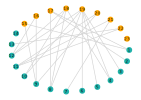

In [ ]:
using GraphPlot
using Graphs
nodes, hyperedges = size(h)
nodes_membership = fill(1, nodes)
hyperedges_membership = fill(2, hyperedges)

membership = vcat(nodes_membership, hyperedges_membership)

nodecolor = ["lightseagreen", "orange"]
#membership color
nodefillc = nodecolor[membership]

gplot(b, nodefillc=nodefillc, nodelabel=1:nv(b), layout=circular_layout)

The functionality of `LightGraphs` can be used directly on a bipartite view of a hypergraph. 

In [ ]:
Graphs.a_star(b, 1, 3)

4-element Vector{Graphs.SimpleGraphs.SimpleEdge{Int64}}:
 Edge 1 => 17
 Edge 17 => 8
 Edge 8 => 19
 Edge 19 => 3

In [ ]:
#number of vertices
nv(b)

23

In [ ]:
#number of edges
ne(b)

24

In [ ]:
#neighbors
sort(collect(outneighbors(b,5)))

1-element Vector{Int64}:
 19

In [ ]:
#neighbors
sort(collect(inneighbors(b,9)))

3-element Vector{Int64}:
 15
 16
 20

In [ ]:
#shortest path - it does not consider the nodes associated with a hyperedge
shortest_path(b,1,4)

3-element Vector{Int64}:
 1
 8
 4

## Twosection View of the hypergraph
Represents a two section view of a hypergraph `h`. Note this is a view - changes to the original hypergraph will be automatically reflected in the view.

The bipartite view of a hypergraph is suitable for processing with the `LightGraphs.jl` package.

Several LightGraphs methods are provided for the compability.

 Note that the view will only work correctly for hypergraphs not having overlapping hyperedges. To check
  whether a graph has overlapping edges try has_overlapping_hedges[h) - for such graph you need to fully
  materialize it rather than use a view. This can be achieved via the get_twosection_adjacency_mx[h) method.

In [ ]:
# This condition is required for an unmaterialized `TwoSectionView` representation of a hypergraph to make sense
@assert SimpleHypergraphs.has_overlapping_hedges[h) == false

LoadError: ParseError:
[90m# Error @ [0;0m]8;;file:///home/lenny/Work/julia/graphs/notebooks/In[60]#2:51\[90mIn[60]:2:51[0;0m]8;;\
# This condition is required for an unmaterialized `TwoSectionView` representation of a hypergraph to make sense
@assert SimpleHypergraphs.has_overlapping_hedges[h[48;2;120;70;70m[0;0m) == false
[90m#                                                 └ ── [0;0m[91mExpected `]`[0;0m

In [ ]:
t = TwoSectionView(h)

LoadError: A two section view can be created only for a graph with non overlapping edges

In [ ]:
gplot(t, nodelabel=1:nv(t))

LoadError: UndefVarError: `t` not defined

In [ ]:
#number of vertices
nv[t)

7

In [ ]:
#number of edges
ne[t)

8

In [ ]:
#neighbors
sort[collect[outneighbors[t,5)))

3-element Vector{Int64}:
 3
 4
 6

In [ ]:
#neighbors
sort[collect[inneighbors[t,1)))

2-element Vector{Int64}:
 2
 3

In [ ]:
#shortest path 
shortest_path[t,1,5)

3-element Vector{Int64}:
 1
 3
 5

## Community detection in hypergraphs

Let us consider the following hypergraph

In [ ]:
h = Hypergraph{Float64}(8,7)
h[1:3,1] .= 1.5
h[3,4] = 2.5
h[2,3] = 3.5
h[4,3:4] .= 4.5
h[5,4] = 5.5
h[5,2] = 6.5
h[5,5] = 5.5
h[5,6] = 6.5
h[6,7] = 5.5
h[7,7] = 6.5
h[8,7] = 6.5
h[8,6] = 6.5

h

8×7 Hypergraph{Float64, Nothing, Nothing, Dict{Int64, Float64}}:
 1.5        nothing   nothing   nothing   nothing   nothing   nothing
 1.5        nothing  3.5        nothing   nothing   nothing   nothing
 1.5        nothing   nothing  2.5        nothing   nothing   nothing
  nothing   nothing  4.5       4.5        nothing   nothing   nothing
  nothing  6.5        nothing  5.5       5.5       6.5        nothing
  nothing   nothing   nothing   nothing   nothing   nothing  5.5
  nothing   nothing   nothing   nothing   nothing   nothing  6.5
  nothing   nothing   nothing   nothing   nothing  6.5       6.5

Let us search for communities in the hypergraph `h`

In [ ]:
best_comm = findcommunities(h, CFModularityCNMLike(100))

display(best_comm.bm)

display(best_comm.bp)

0.3193650793650794

2-element Vector{Set{Int64}}:
 Set([4, 2, 3, 1])
 Set([5, 6, 7, 8])

And now we visualize them in 2-section view

In [ ]:
t = TwoSectionView(h)

function get_color(i, bp)
    color = ["red","green","blue","yellow"]
    for j in 1:length(bp)
        if i in bp[j]
            return color[j]
        end
    end
    return "black"
end

gplot(t, nodelabel=1:nv(t), nodefillc=get_color.(1:nv(t), Ref(best_comm.bp) ))




LoadError: UndefVarError: `nv` not defined